# Description of the dataset and the task
- Data Collection
- Implications on the types of conclusions that could be made from the data
- Description of the variables, observations, and/or structure of the data
- Target task

In [1]:
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [40]:
# Create a list with the filepaths for training and testing
batch_size = 32
img_height = 224
img_width = 224

train_path = Path('dataset/train')
test_path = Path('dataset/test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, 
    seed=123, 
    image_size=(img_height, img_width))

class_names = train_ds.class_names
print(class_names)
print(len(class_names))

Found 3625 files belonging to 33 classes.
Using 2900 files for training.
Found 3625 files belonging to 33 classes.
Using 725 files for validation.
Found 330 files belonging to 33 classes.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
33


In [41]:
class_names = np.array(train_ds.class_names)
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato' 'raddish'
 'soy beans' 'spinach' 'sweetpotato' 'tomato' 'turnip' 'watermelon']


In [61]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


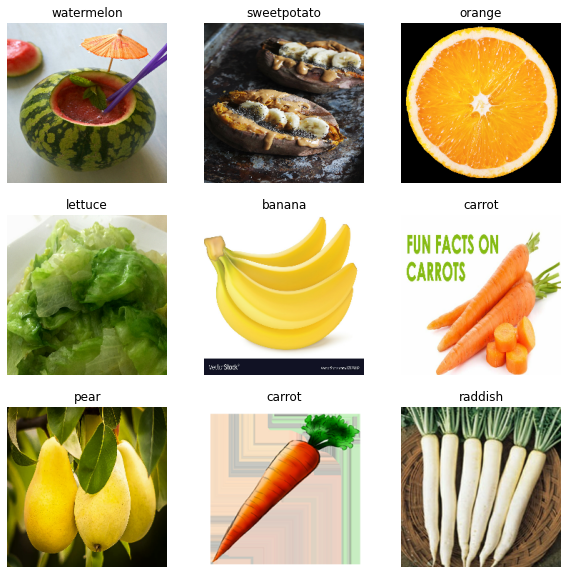

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Exploratory data analysis
- Mean Image
- Distribution of the Size of Images
- Distribution of labels

# Data Pre-processing and Cleaning
- Change into same dimensions

In [5]:
# num_classes=33
# IMG_SIZE = 244
# resize_and_rescale = tf.keras.Sequential([
#   tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
#   tf.keras.layers.Rescaling(1./255)
# ])

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
# ])
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.2),
# ])

In [6]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
# train_ds = prepare(train_ds, shuffle=True, augment=True)
# val_ds = prepare(val_ds)
# test_ds = prepare(test_ds)

In [8]:
# model = tf.keras.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(num_classes)
# ])

In [9]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [10]:
# epochs=10
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [11]:
# model.summary()

In [12]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [13]:
# loss, acc = model.evaluate(test_ds)
# print("Accuracy", acc)

In [14]:
# import os
# img = tf.keras.utils.load_img(
#     'Image_110.jpg', target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [15]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard

In [23]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

classifier_model = mobilenet_v2

10484/10484 [==============================] - 0s 0us/step


In [17]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [47]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [48]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [96]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

test_ds = test_ds.shuffle(2)
for test_image_batch, test_labels_batch in test_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


In [21]:
result_batch = classifier.predict(train_ds)

91/91 [==============================] - 44s 462ms/step


In [24]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names

array(['orange', 'head cabbage', 'buckeye', ..., 'banana', 'coil',
       'hen-of-the-woods'], dtype='<U30')

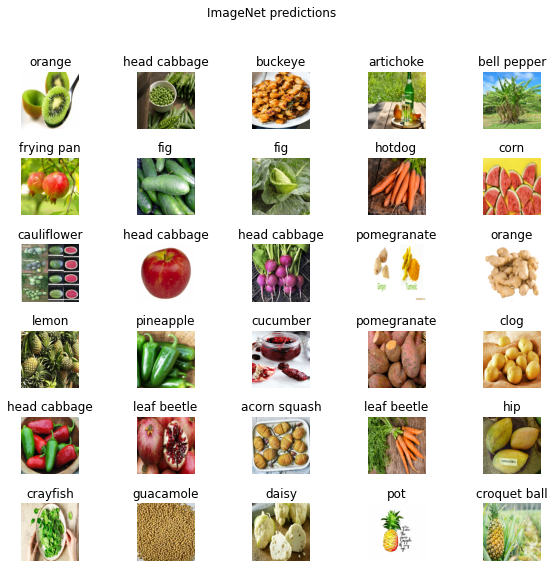

In [25]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [26]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_model = mobilenet_v2

In [27]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [28]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [29]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 33)                42273     
                                                                 
Total params: 2,300,257
Trainable params: 42,273
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
predictions = model(image_batch)

In [31]:
predictions.shape

TensorShape([32, 33])

In [32]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [35]:
NUM_EPOCHS = 10

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/10
91/91 [==============================] - 48s 522ms/step - loss: 0.7303 - acc: 0.8186 - val_loss: 0.7203 - val_acc: 0.8166
Epoch 2/10
91/91 [==============================] - 44s 485ms/step - loss: 0.4378 - acc: 0.9010 - val_loss: 0.6126 - val_acc: 0.8372
Epoch 3/10
91/91 [==============================] - 45s 495ms/step - loss: 0.3066 - acc: 0.9369 - val_loss: 0.5670 - val_acc: 0.8400
Epoch 4/10
91/91 [==============================] - 45s 491ms/step - loss: 0.2256 - acc: 0.9600 - val_loss: 0.5431 - val_acc: 0.8483
Epoch 5/10
91/91 [==============================] - 44s 490ms/step - loss: 0.1715 - acc: 0.9738 - val_loss: 0.5288 - val_acc: 0.8566
Epoch 6/10
91/91 [==============================] - 45s 496ms/step - loss: 0.1346 - acc: 0.9852 - val_loss: 0.5196 - val_acc: 0.8552
Epoch 7/10
91/91 [==============================] - 45s 495ms/step - loss: 0.1089 - acc: 0.9910 - val_loss: 0.5139 - val_acc: 0.8593
Epoch 8/10
91/91 [==============================] - 45s 494ms/step - 

In [36]:
%tensorboard --logdir logs/fit

In [55]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

11/11 [==============================] - 5s 353ms/step - loss: 0.4750 - acc: 0.8697
Test accuracy : 0.8696969747543335


In [42]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 0s 351ms/step
['kiwi' 'peas' 'sweetpotato' 'pear' 'banana' 'pomegranate' 'cucumber'
 'cabbage' 'carrot' 'watermelon' 'watermelon' 'apple' 'raddish' 'ginger'
 'ginger' 'pineapple' 'jalepeno' 'pomegranate' 'sweetpotato' 'potato'
 'jalepeno' 'pomegranate' 'potato' 'carrot' 'mango' 'spinach' 'soy beans'
 'cauliflower' 'pineapple' 'pineapple' 'sweetpotato' 'cabbage']


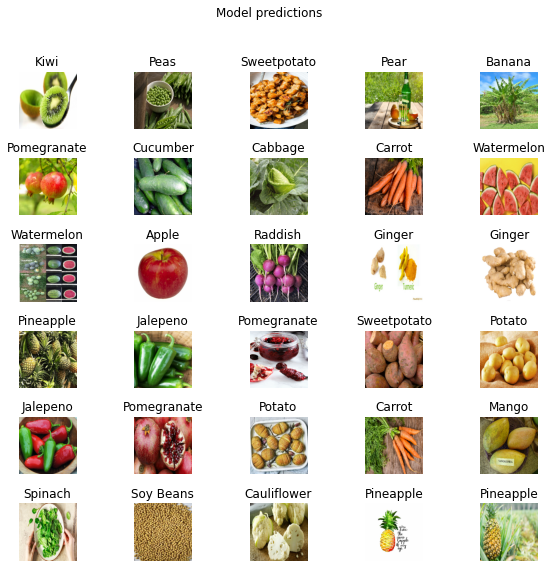

In [43]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

In [94]:
test_ds = test_ds.shuffle(2)
for test_image_batch, test_labels_batch in test_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [97]:
predicted_batch = model.predict(test_image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 0s 369ms/step
['pomegranate' 'pineapple' 'lemon' 'lettuce' 'turnip' 'pineapple'
 'eggplant' 'carrot' 'carrot' 'cauliflower' 'cucumber' 'apple' 'garlic'
 'apple' 'apple' 'peas' 'eggplant' 'lemon' 'pear' 'tomato' 'onion' 'onion'
 'chilli pepper' 'pineapple' 'onion' 'raddish' 'tomato' 'onion'
 'chilli pepper' 'jalepeno' 'soy beans' 'kiwi']


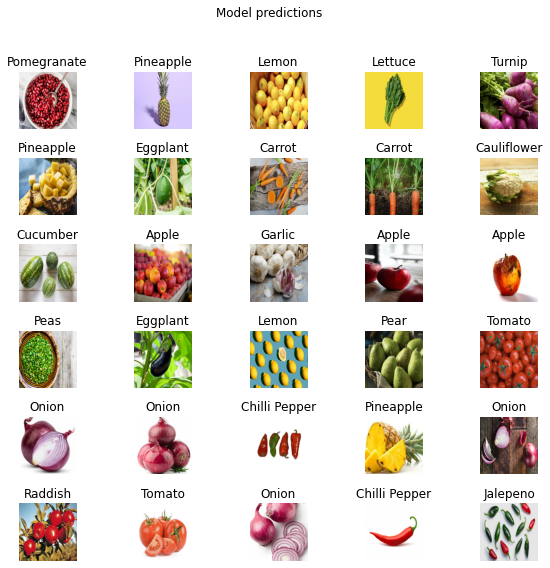

In [93]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(test_image_batch[n])
    plt.title(predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

In [100]:
t = time.time()

export_path = "saved_models/{}".format(int(t))
model.save(export_path)

export_path

INFO:tensorflow:Assets written to: saved_models/1656602198\assets


INFO:tensorflow:Assets written to: saved_models/1656602198\assets


'saved_models/1656602198'

In [101]:
reloaded = tf.keras.models.load_model(export_path)

In [102]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

1/1 [==============================] - 1s 830ms/step


In [103]:
abs(reloaded_result_batch - result_batch).max()

0.0

In [104]:
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

['turnip' 'orange' 'corn' 'kiwi' 'cucumber' 'ginger' 'mango' 'carrot'
 'orange' 'cucumber' 'bell pepper' 'apple' 'apple' 'chilli pepper'
 'soy beans' 'garlic' 'pomegranate' 'onion' 'watermelon' 'tomato' 'pear'
 'sweetpotato' 'turnip' 'raddish' 'tomato' 'lemon' 'pomegranate' 'pear'
 'chilli pepper' 'soy beans' 'chilli pepper' 'beetroot']


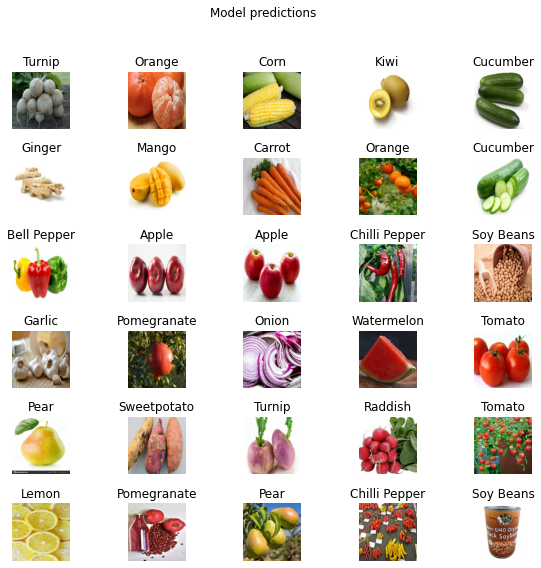

In [105]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(reloaded_predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

In [106]:
# predict on the test dataset
reloaded_result_batch = reloaded.predict(test_image_batch)
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

1/1 [==============================] - 0s 385ms/step
['pomegranate' 'pineapple' 'lemon' 'lettuce' 'turnip' 'pineapple'
 'eggplant' 'carrot' 'carrot' 'cauliflower' 'cucumber' 'apple' 'garlic'
 'apple' 'apple' 'peas' 'eggplant' 'lemon' 'pear' 'tomato' 'onion' 'onion'
 'chilli pepper' 'pineapple' 'onion' 'raddish' 'tomato' 'onion'
 'chilli pepper' 'jalepeno' 'soy beans' 'kiwi']


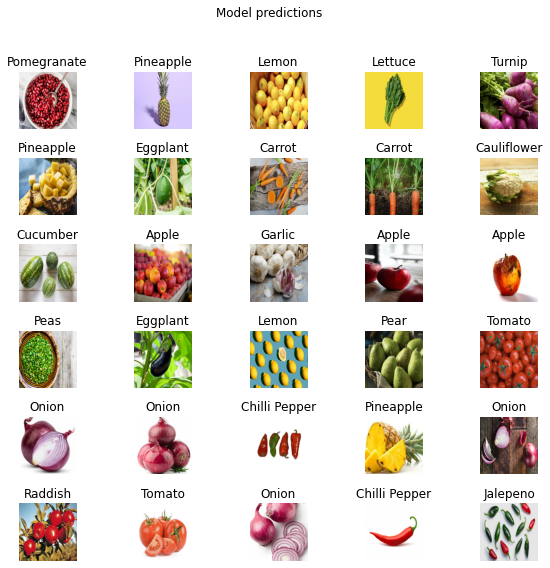

In [107]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(test_image_batch[n])
    plt.title(reloaded_predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

# Model Training

# Model Selection and Hyperparameter Tuning

# Insights and conclusions